<a href="https://colab.research.google.com/github/shre2398/TensorflowForAI/blob/main/cats_and_dogs_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download datasets

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-04-23 07:14:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.217.8.16, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   182MB/s    in 0.4s    

2021-04-23 07:14:54 (182 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Unzip the downloaded dataset and define directories

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cats_fnames = os.listdir(train_cats_dir)
print(train_cats_fnames[:10])

train_dogs_fnames = os.listdir(train_dogs_dir)
print(train_dogs_fnames[:10])

validation_cats_fnames = os.listdir(validation_cats_dir)
print(validation_cats_fnames[:10])

validation_dogs_fnames = os.listdir(validation_dogs_dir)
print(validation_dogs_fnames[:10])

['cat.372.jpg', 'cat.259.jpg', 'cat.603.jpg', 'cat.149.jpg', 'cat.230.jpg', 'cat.195.jpg', 'cat.415.jpg', 'cat.519.jpg', 'cat.950.jpg', 'cat.548.jpg']
['dog.593.jpg', 'dog.374.jpg', 'dog.175.jpg', 'dog.403.jpg', 'dog.630.jpg', 'dog.458.jpg', 'dog.936.jpg', 'dog.202.jpg', 'dog.279.jpg', 'dog.789.jpg']
['cat.2277.jpg', 'cat.2101.jpg', 'cat.2349.jpg', 'cat.2023.jpg', 'cat.2034.jpg', 'cat.2368.jpg', 'cat.2147.jpg', 'cat.2255.jpg', 'cat.2298.jpg', 'cat.2084.jpg']
['dog.2449.jpg', 'dog.2391.jpg', 'dog.2378.jpg', 'dog.2181.jpg', 'dog.2410.jpg', 'dog.2276.jpg', 'dog.2412.jpg', 'dog.2319.jpg', 'dog.2288.jpg', 'dog.2314.jpg']


In [ ]:
print('Total training cats images:', len(os.listdir(train_cats_dir)))
print('Total training dogs images:', len(os.listdir(train_dogs_dir)))
print('Total validation cats images:', len(os.listdir(validation_cats_dir)))
print('Total validation dogs images:', len(os.listdir(validation_dogs_dir)))

Total training cats images: 1000
Total training dogs images: 1000
Total validation cats images: 500
Total validation dogs images: 500


## Display a batch of images

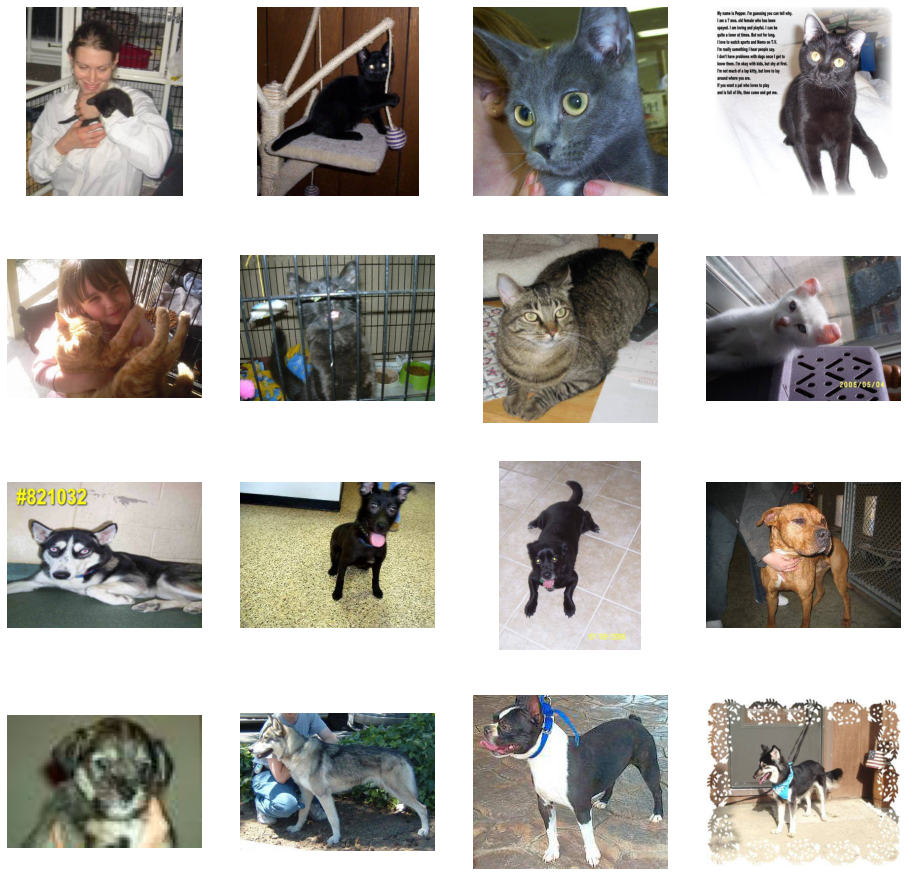

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parameteres for 4x4 image
nrows = 4
ncols = 4

# index for interation
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                  for fname in train_cats_fnames[pic_index-8: pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                  for fname in train_dogs_fnames[pic_index-8: pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building a small model from scratch

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3,), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3,), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3,), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),    
  # tf.keras.layers.Conv2D(16, (3,3,), activation='relu'),
  # tf.keras.layers.MaxPooling2D(2,2),    
  # tf.keras.layers.Conv2D(16, (3,3,), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

## Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Rescale images by 1./255
train_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

# Flow images in batches of 128 using data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # resize all images to 300x300
    batch_size=20,
    class_mode='binary' # since we use binary_crossentropy, we need binary labels
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150), # resize all images to 300x300
    batch_size=20,
    class_mode='binary' # since we use binary_crossentropy, we need binary labels
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    verbose=2,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/15
100/100 - 40s - loss: 0.7400 - accuracy: 0.5615 - val_loss: 0.6653 - val_accuracy: 0.6460
Epoch 2/15
100/100 - 8s - loss: 0.6342 - accuracy: 0.6500 - val_loss: 0.5964 - val_accuracy: 0.7070
Epoch 3/15
100/100 - 8s - loss: 0.5618 - accuracy: 0.7150 - val_loss: 0.6297 - val_accuracy: 0.6360
Epoch 4/15
100/100 - 8s - loss: 0.5095 - accuracy: 0.7590 - val_loss: 0.5974 - val_accuracy: 0.7080
Epoch 5/15
100/100 - 8s - loss: 0.4358 - accuracy: 0.8010 - val_loss: 0.5366 - val_accuracy: 0.7340
Epoch 6/15
100/100 - 8s - loss: 0.3848 - accuracy: 0.8325 - val_loss: 0.6844 - val_accuracy: 0.6920
Epoch 7/15
100/100 - 8s - loss: 0.3264 - accuracy: 0.8515 - val_loss: 0.6464 - val_accuracy: 0.7070
Epoch 8/15
100/100 - 8s - loss: 0.2550 - accuracy: 0.8895 - val_loss: 0.7541 - val_accuracy: 0.7320
Epoch 9/15
100/100 - 8s - loss: 0.2186 - accuracy: 0.9090 - val_loss: 0.9275 - val_accuracy: 0.6870
Epoch 10/15
100/100 - 8s - loss: 0.1515 - accuracy: 0.9390 - val_loss: 0.9780 - val_accuracy: 0.703

## Running the model

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if(classes[0] > 0):
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")  

KeyboardInterrupt: ignored

## Visualizing Intermediate Representation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


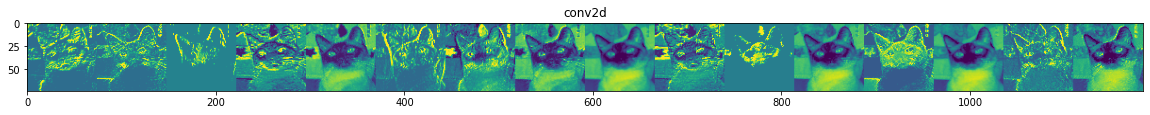

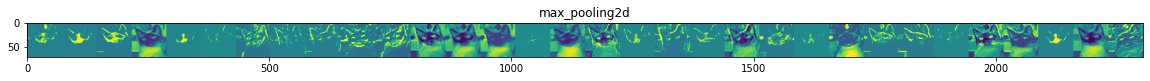

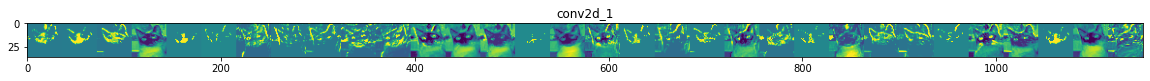

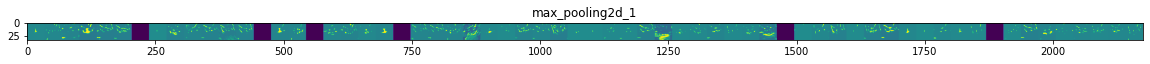

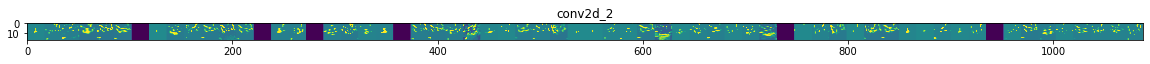

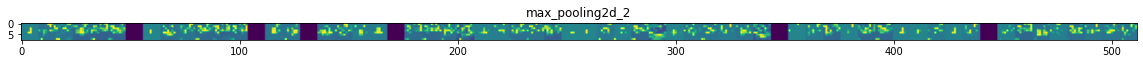

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

## Evaluating Accuracy and Loss for the model

Text(0.5, 1.0, 'Training and validation loss')

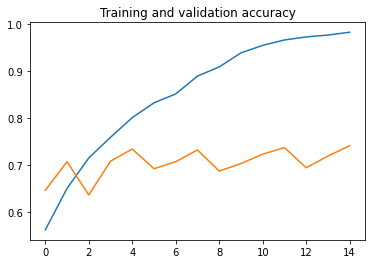

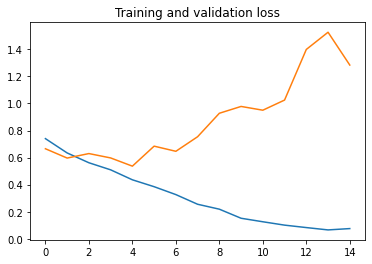

In [ ]:
#---------------------------------------------
# Retrive list of results on training and test 
# data sets for each training epoch
#---------------------------------------------
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')